In [1]:
# Stdlib
import pickle
from IPython.display import display, Latex

# Scientific computing
import numpy as np

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from tabulate import tabulate

# Preprocessing

## Loading and concatenating dataframes

In [2]:
# Small datasets
metadata = {
    "PROJECT_ID": "EMB_ex27",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v1.0",
    "DATE": "20230223"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

In [3]:
# MEC reference
with open("../../results/MEC/figure4a_data.pk", "rb") as _fh:
    arxiv_DC = pickle.load(_fh)[('DC', 2, 6)]
with open("../../results/MEC/figure4b_data.pk", "rb") as _fh:
    drosophila_DC = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/figure4c_data.pk", "rb") as _fh:
    celegans_DC = pickle.load(_fh)[('DC', 1, 2)]
with open("../../results/MEC/figure4d_data.pk", "rb") as _fh:
    london_DC = pickle.load(_fh)[('DC', 1, 2)]

## Pruning

In [4]:
# Drop dummy index
df = df.drop(columns=["Unnamed: 0"])

# Drop rows with infs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace=True)

## Reindexing and renaming

In [5]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [6]:
df.describe()

,alpha,beta,theta,accuracy,auroc,aupr,process_time,wall_time
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000
mean,1.250149,3.000596,0.500268,0.745275,0.822512,0.829426,0.079929,0.079930
std,0.433228,1.732911,0.272429,0.166062,0.214695,0.272972,0.081994,0.081994
min,1.000000,2.000000,0.050000,0.256198,0.265856,0.234401,0.004342,0.004342
25%,1.000000,2.000000,0.275000,0.676956,0.710142,0.786221,0.006467,0.006468
50%,1.000000,2.000000,0.500000,0.725306,0.937859,0.986067,0.081683,0.081683
75%,1.500000,4.000000,0.725000,0.917103,0.973061,0.993670,0.158033,0.158034
max,2.000000,6.000000,0.950000,0.944151,1.000000,1.000000,0.269244,0.269244


# Analysis

<Figure size 640x480 with 0 Axes>

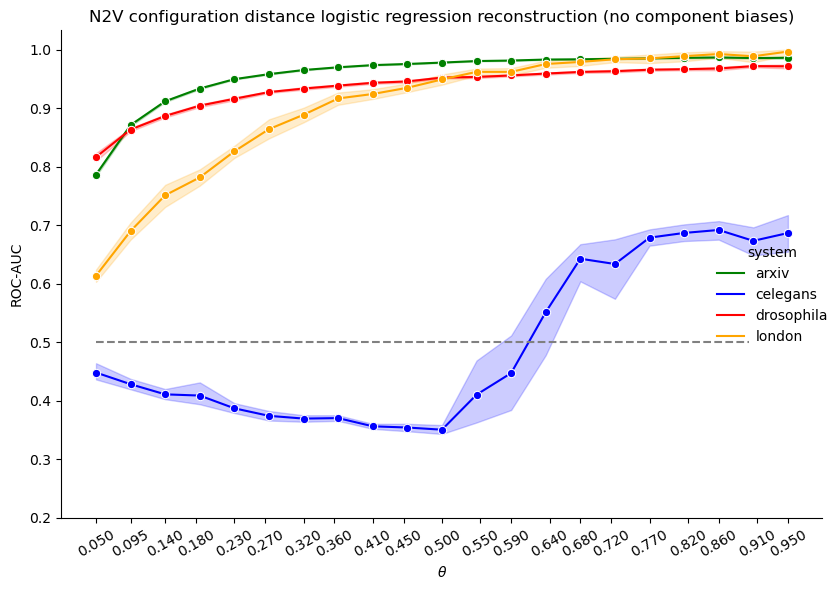

In [7]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.2, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("N2V configuration distance logistic regression reconstruction (no component biases)")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance.png", facecolor="white", transparent=False)

Text(0.5, 1.0, 'Reproduce Naive Bayes DC results')

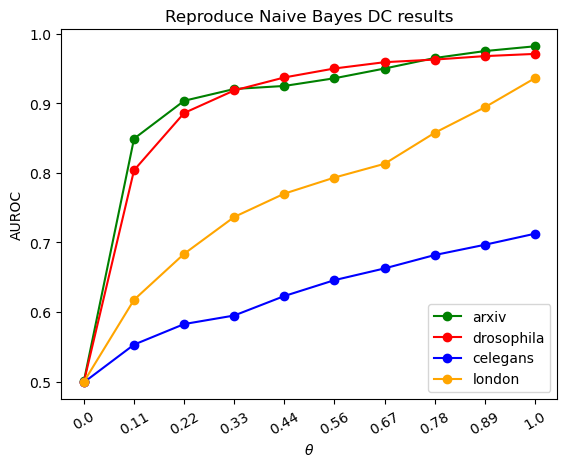

In [26]:
plt.figure()

plt.plot(arxiv_DC[2], label="arxiv", color="green", marker="o")
plt.plot(drosophila_DC[2], label="drosophila", color="red", marker="o")
plt.plot(celegans_DC[2], label="celegans", color="blue", marker="o")
plt.plot(london_DC[2], label="london", color="orange", marker="o")

plt.legend()

plt.xticks(
    range(10),
    [
        float(np.format_float_scientific(x, precision=1))
        for x in np.linspace(0, 1, 10)
    ],
    rotation=30
)

plt.xlabel("$\\theta$")
plt.ylabel("AUROC")

plt.title("Reproduce Naive Bayes DC results")

<Figure size 640x480 with 0 Axes>

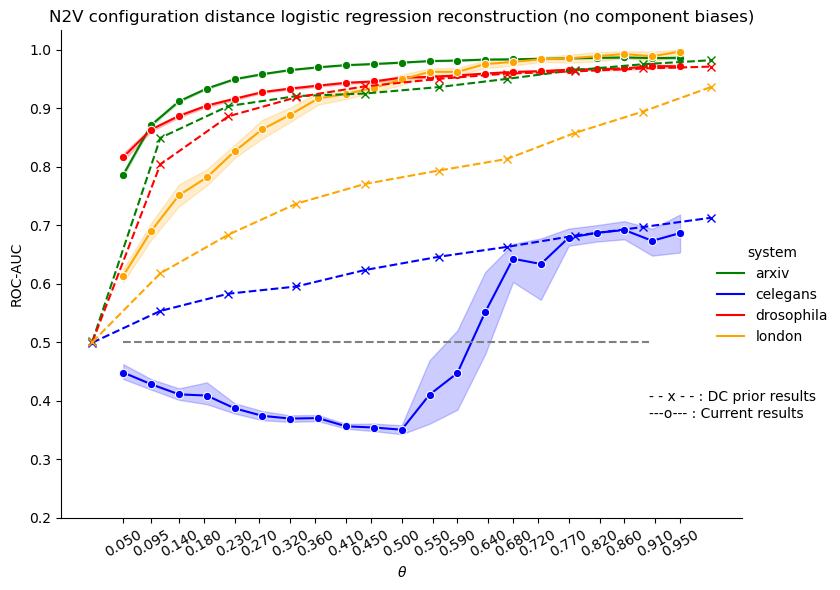

In [27]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
## ex27
sns.relplot(
    data=df, kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
    legend=True
)
## MEC
ticks_ = [float(np.format_float_scientific(x, precision=1)) for x in np.linspace(0, 1, 10)]
plt.plot(ticks_, arxiv_DC[2], label="arxiv", color="green", marker="x", linestyle="--")
plt.plot(ticks_, drosophila_DC[2], label="drosophila", color="red", marker="x", linestyle="--")
plt.plot(ticks_, celegans_DC[2], label="celegans", color="blue", marker="x", linestyle="--")
plt.plot(ticks_, london_DC[2], label="london", color="orange", marker="x", linestyle="--")

# Axes configuration
plt.hlines(0.5, 0.05, 0.9, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.2, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.text(0.9, 0.4, "- - x - - : DC prior results")
plt.text(0.9, 0.37, "---o--- : Current results")
plt.title("N2V configuration distance logistic regression reconstruction (no component biases)")

# Save plot
plt.tight_layout()
plt.savefig("../../results/plots/line_auroc-pfi_N2V-logreg-configuration-distance_MEC-baseline.png", facecolor="white", transparent=False)